In [1]:
#!/usr/bin/env python3

import csv
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def import_data(path):
    """Load data from csv file into 2d array and return to call site"""
    data = []
    with open(path, "r") as file:
        file_handle = csv.reader(file)
        for row in file_handle:
            numeric_data = [float(i) for i in row]
            data.append(numeric_data)
    return data

In [3]:
def measure_python_list_performance():
    with open('./raw/python_list_performance.csv', 'w') as f:
        subject = []
        for i in range(100):
            t1 = time.process_time()
            subject.append(i)
            t2 = time.process_time()
            f.write(f"{i},{(t2 - t1):.16f}\n")

In [4]:
measure_python_list_performance()
data = import_data("./raw/python_list_performance.csv")
data

[[0.0, 3.567e-06],
 [1.0, 5.009999999e-07],
 [2.0, 4.009999999e-07],
 [3.0, 3.81e-07],
 [4.0, 4.21e-07],
 [5.0, 3.81e-07],
 [6.0, 3.81e-07],
 [7.0, 3.81e-07],
 [8.0, 5.009999999e-07],
 [9.0, 3.81e-07],
 [10.0, 3.909999999e-07],
 [11.0, 3.81e-07],
 [12.0, 3.710000001e-07],
 [13.0, 3.7e-07],
 [14.0, 3.81e-07],
 [15.0, 3.710000001e-07],
 [16.0, 5.310000002e-07],
 [17.0, 3.81e-07],
 [18.0, 3.799999999e-07],
 [19.0, 3.800000001e-07],
 [20.0, 3.710000001e-07],
 [21.0, 3.710000001e-07],
 [22.0, 3.81e-07],
 [23.0, 3.799999999e-07],
 [24.0, 4.409999999e-07],
 [25.0, 3.81e-07],
 [26.0, 3.710000001e-07],
 [27.0, 3.81e-07],
 [28.0, 3.81e-07],
 [29.0, 3.710000001e-07],
 [30.0, 3.710000001e-07],
 [31.0, 3.710000001e-07],
 [32.0, 4.4e-07],
 [33.0, 3.909999999e-07],
 [34.0, 3.81e-07],
 [35.0, 3.81e-07],
 [36.0, 3.710000001e-07],
 [37.0, 3.799999999e-07],
 [38.0, 3.6e-07],
 [39.0, 3.710000001e-07],
 [40.0, 5.31e-07],
 [41.0, 3.910000002e-07],
 [42.0, 3.81e-07],
 [43.0, 3.81e-07],
 [44.0, 3.709999998e-0

In [5]:
n = [int(i[0]) for i in data]
t = [i[1] for i in data]

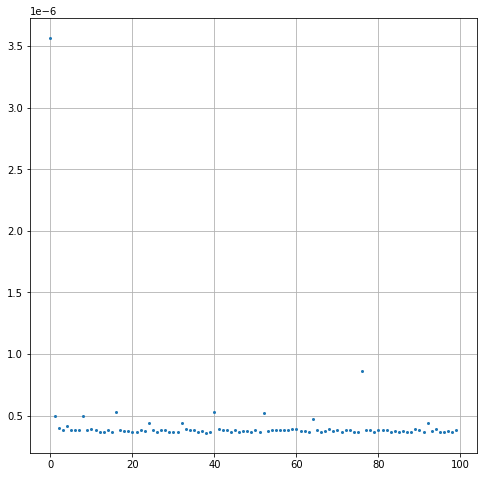

In [6]:


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)
# ax.set_xlim(0,100)
# ax.set_ylim(0,100)
# ax.spines['top'].set_color("#aaaaaa")
# ax.spines['right'].set_color("#aaaaaa")
# ax.spines['right'].set_visible(False)
# ax.axis("square")
ax.grid()
ax.plot(n, t, marker="o", linestyle="None", markersize=2)